## Data preprocessing


In [1]:
import pandas as pd
from surprise import Dataset, Reader

In [2]:
#Properation data
def load_data():
    try:
        ratings = pd.read_csv ('ratings.csv', skiprows=1, names=['user_id', 'movie_id', 'rating', 'timestamp'])
        movies = pd.read_csv('movies.csv', skiprows=1, names=['movie_id', 'title', 'genres'])
        
        # Displa yrows
        print("Ratings Data:")
        print(ratings.head())
        
        print("\nMovies Data:")
        print(movies.head())
        
        # Check for missing values
        print("\nMissing values in ratings data:")
        print(ratings.isnull().sum())
        
        print("\nMissing values in movies data:")
        print(movies.isnull().sum())

        # Read the data into a Surprise datasets
        reader = Reader(rating_scale=(1, 5))
        data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)
        
        return data, ratings, movies
        
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None, None

# Load and check data
data, ratings, movies = load_data()
if data is not None:
    print("Data loaded successfully.")

Ratings Data:
   user_id  movie_id  rating  timestamp
0        1        17     4.0  944249077
1        1        25     1.0  944250228
2        1        29     2.0  943230976
3        1        30     5.0  944249077
4        1        32     5.0  943228858

Movies Data:
   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Missing values in ratings data:
user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

Missing values in movies

## collaborative_filtering


In [3]:
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split
import pickle

In [4]:

if data is not None:
    # Split the data into training and test sets
    trainset, testset = train_test_split(data, test_size=0.25)

    # Use SVD for collaborative filtering
    k_factors = 5
    model = SVD(n_factors= k_factors, n_epochs= 200, biased= True, lr_all= 0.005, reg_all= 0, init_mean= 0, init_std_dev= 0.01)
    model.fit(trainset)

    # Predict ratings for the testset
    predictions = model.test(testset)

    # Evaluate performance
    rmse = accuracy.rmse(predictions)
    print(f'RMSE: {rmse}')


# Save the model
with open('svd_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


# # Load the model
# with open('svd_model.pkl', 'rb') as model_file:
#     model = pickle.load(model_file)

RMSE: 0.8007
RMSE: 0.800718640281221


## evaluation_visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

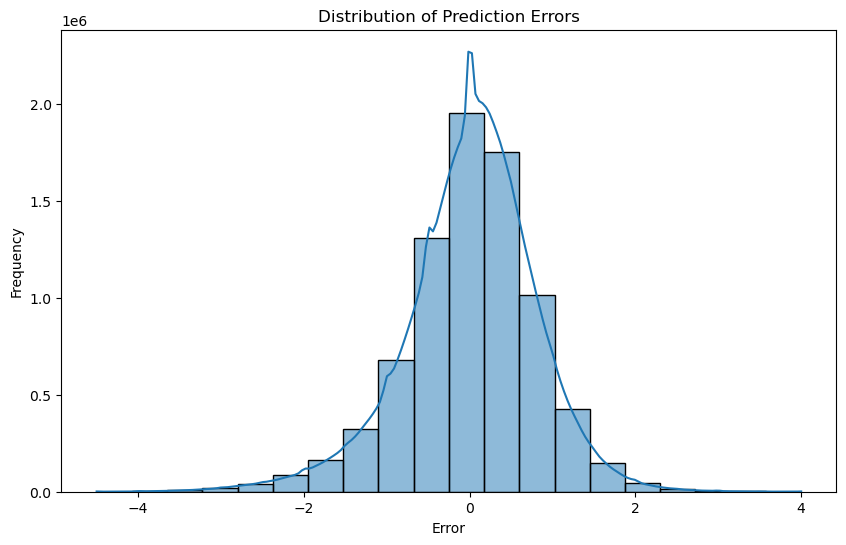

In [11]:
def visualize_ratings(predictions):
    # Convert predictions to DataFrame
    df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    

    df['error'] = df['true_r'] - df['est']

    plt.figure(figsize=(10, 6))
    sns.histplot(df['error'], bins=20, kde=True)
    plt.title('Distribution of Prediction Errors')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()
    
# Visualize results
visualize_ratings(predictions)

In [12]:
# Summary statistics in csv files

# print("\nSummary Statistics for Ratings Data:")
# print(ratings.describe())

# print("\nSummary Statistics for Movies Data:")
# print(movies.describe())


Summary Statistics for Ratings Data:
            user_id      movie_id        rating     timestamp
count  3.200020e+07  3.200020e+07  3.200020e+07  3.200020e+07
mean   1.002785e+05  2.931861e+04  3.540396e+00  1.275241e+09
std    5.794905e+04  5.095816e+04  1.058986e+00  2.561630e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    5.005300e+04  1.233000e+03  3.000000e+00  1.051012e+09
50%    1.002970e+05  3.452000e+03  3.500000e+00  1.272622e+09
75%    1.504510e+05  4.419900e+04  4.000000e+00  1.503158e+09
max    2.009480e+05  2.927570e+05  5.000000e+00  1.697164e+09

Summary Statistics for Movies Data:
            movie_id
count   87585.000000
mean   157651.365519
std     79013.402099
min         1.000000
25%    112657.000000
50%    165741.000000
75%    213203.000000
max    292757.000000
